<a href="https://colab.research.google.com/github/KimHeeyeon2/KHY3/blob/master/g_12_0409_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%ED%9A%8C%EA%B7%80%EC%99%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

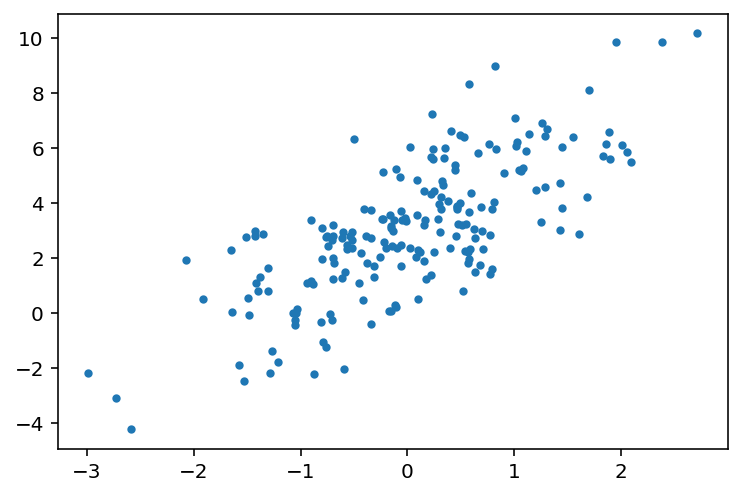

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [2]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[1.87565697]
2.981813651814331


## 회귀직선

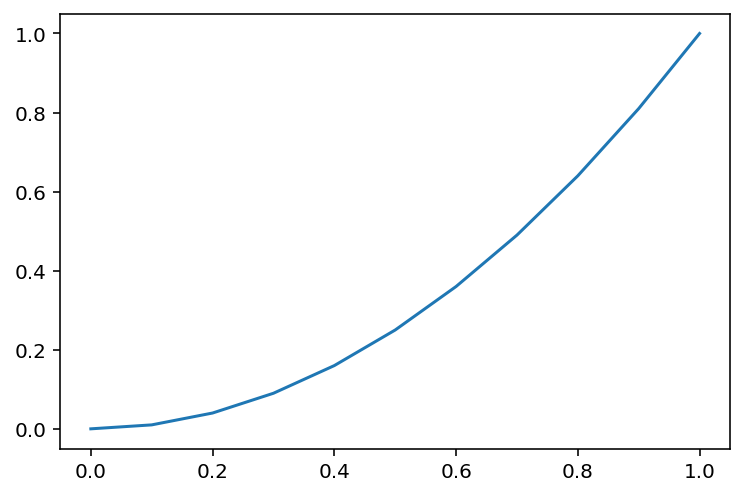

In [5]:
t=np.linspace(0, 1, 11) #linspace 0-1까지 11개로 쪼개봐
t
plt.plot(t, t*t)

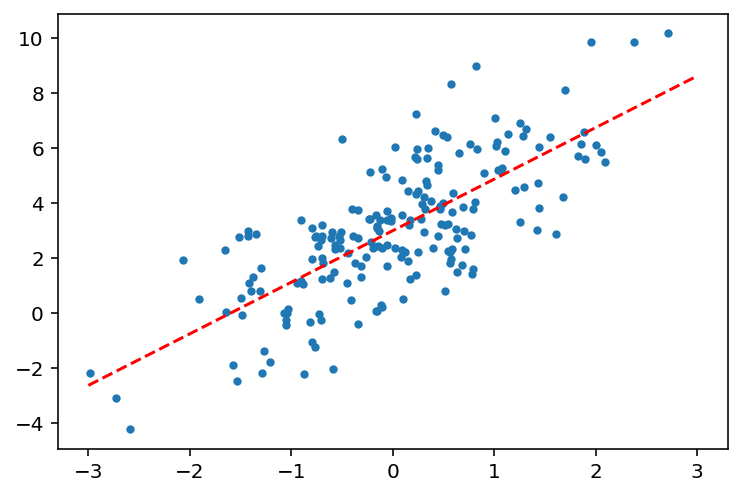

In [9]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 10) #linspace 
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

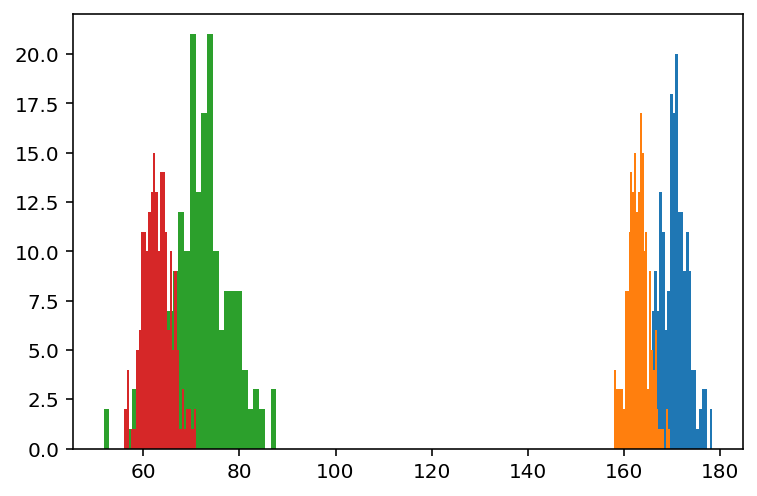

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 
x1 = 3*np.random.randn(n_samples) + 170 #예로 남자 키 랜덤데이터 생성
x2 = 2*np.random.randn(n_samples) + 163 #예로 여자 키 랜덤데이터 생성

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg 남자 데이터
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg 여자 데이터
plt.hist(x1, bins=30) #히스토그램 그래프
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [13]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2) #데이터를 주면 x-train, y-train, t-test, y-test로 랜덤하게 나눠줌 default shffling 75% 트레인, 25% 테스트 하지만 정해줄수있음, 시계열 데이터의 경우 순섣대로 해야하니까 shufffle= false로 지정해줘야함
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.8035056859829278

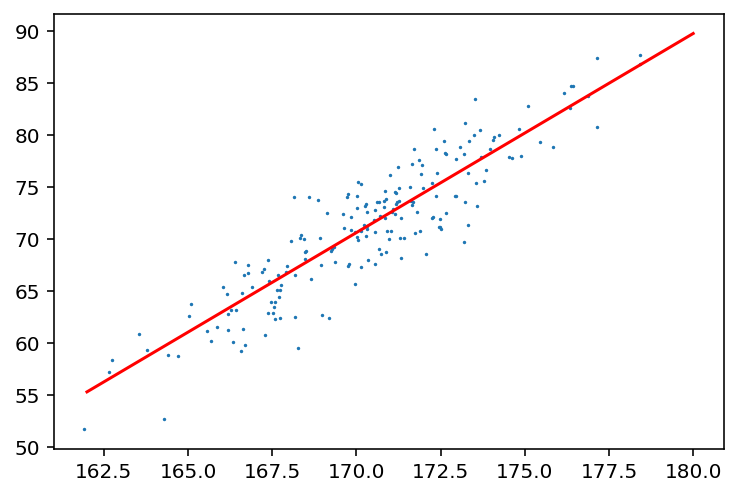

In [14]:
xs = np.linspace(162,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [15]:
x = np.concatenate((x1, x2)) #concatenate -> 붙이는거 데이터 합칠때 사용
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.8506533197555288

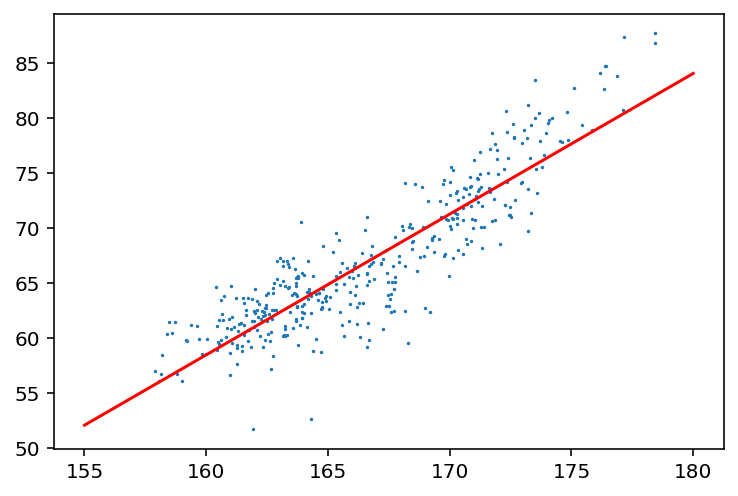

In [16]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [18]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X[:10]

,height,sex
0,175.827148,0
1,164.298482,0
2,170.148946,0
3,171.325969,0
4,166.902101,0
5,173.329557,0
6,165.560055,0
7,168.150143,0
8,168.578530,0
9,171.162152,0


x

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.8038465085283188

## 성별을 고려하여 성능이 개선됨

In [25]:
print(leg.coef_)
print(leg.intercept_)

[1.62187374 3.82797491]
-205.29312985496844


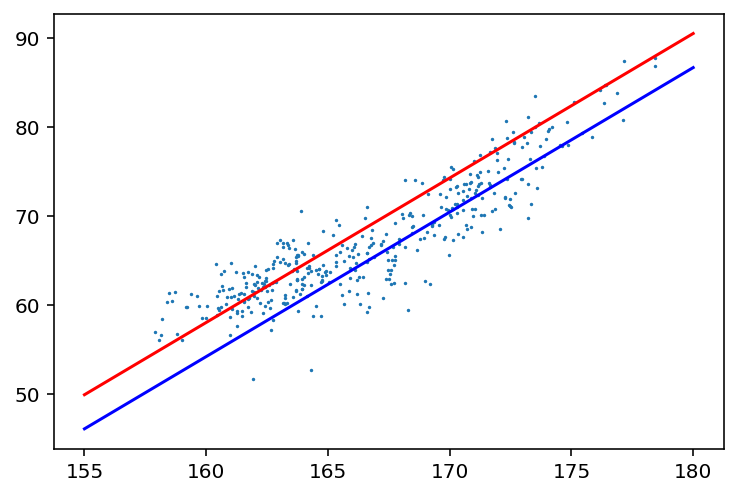

In [26]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_ #키와 성별에 해당되는 가중치 coef[0] 남성, coef[1]  여성
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류

In [27]:
X["weight"] = y
X[:10]

,height,sex,weight
0,175.827148,0,78.867522
1,164.298482,0,52.657036
2,170.148946,0,70.782304
3,171.325969,0,72.032461
4,166.902101,0,65.345754
5,173.329557,0,79.384229
6,165.560055,0,61.144565
7,168.150143,0,74.067755
8,168.578530,0,74.021181
9,171.162152,0,74.414431


In [28]:

y = X["sex"] ;y[:5]

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [29]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,175.827148,78.867522
1,164.298482,52.657036
2,170.148946,70.782304
3,171.325969,72.032461
4,166.902101,65.345754


In [30]:
from sklearn.linear_model import SGDClassifier #분류기 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)
clf = SGDClassifier() #분류기를 clf로 만들고
clf.fit(X_train, y_train) #모델생성후
clf.score(X_test, y_test) #성능이 나오는데 default는 accuracy가 나옴
#분류 문제니까 값은 accuracy가 나옴

0.975

In [31]:
X_sc[:10]

array([[ 2.02293382,  1.81455052],
       [-0.52155736, -2.21284873],
       [ 0.76969814,  0.57220798],
       [ 1.02947869,  0.76430227],
       [ 0.05308711, -0.26315064],
       [ 1.47169065,  1.89394567],
       [-0.24311575, -0.90868879],
       [ 0.32854235,  1.07703735],
       [ 0.42309165,  1.06988111],
       [ 0.99332284,  1.13030621]])

In [0]:
y_pred = clf.predict(X_test)

In [34]:
y_pred[:10], y_test[:10]  #예측치, 실측치 여,남,여,남,남,남,여,여,여,남 으로 나옴

(array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0]), 202    1
 192    0
 331    1
 112    0
 220    1
 183    0
 213    1
 235    1
 375    1
 139    0
 Name: sex, dtype: int64)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [36]:
confusion_matrix(y_test, y_pred) 
#TP, FN, FP, TN

array([[40,  0],
       [ 2, 38]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.95      0.97        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [0]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [0]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

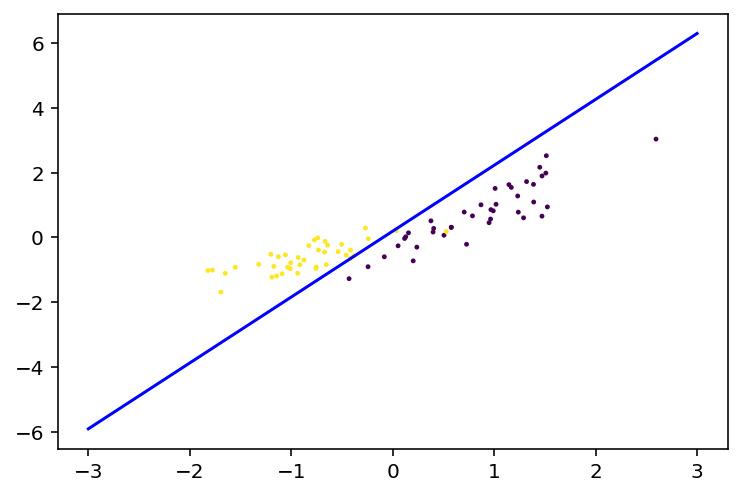

In [54]:
#표준스케일링 사용값
xs = np.linspace(-3,3,10)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

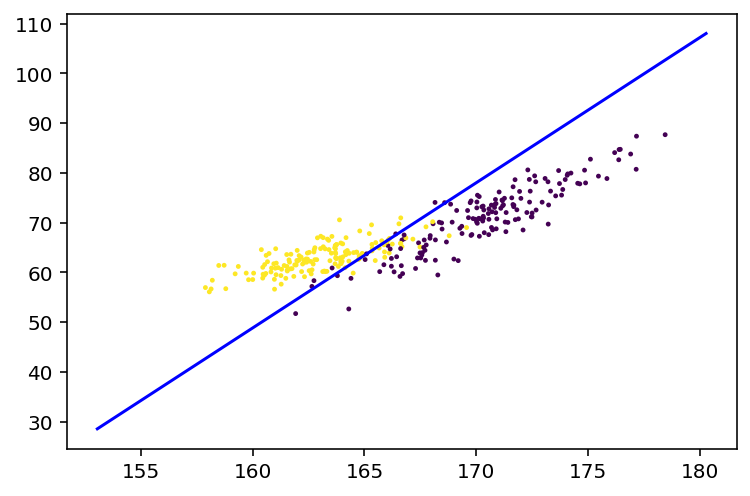

In [43]:
#다시 원래값으로 환산
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [0]:
#score 얻거나, 확률을 계산해주는 함수, cf predict 함수는 분류만 알려줌,
scores = clf.decision_function(X_test)

In [46]:
scores[:10]

array([ 4.18997211, -3.10649788,  6.3549808 , -4.46316704, -0.24848013,
       -4.13432563,  7.32518536,  1.10125177,  3.68790675, -1.84547909])

In [0]:
fpr = dict() #ROC 커브 그릴때 x FPR, y TPR 
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores) #score 
roc_auc = auc(fpr, tpr)

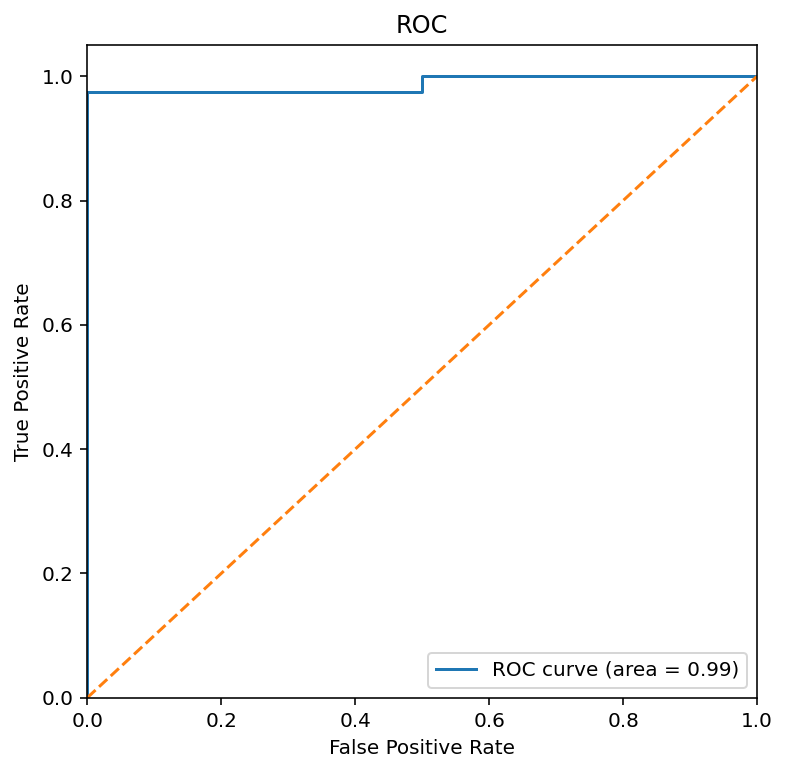

In [48]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375

## (참고) ROC 성능 비교

In [0]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


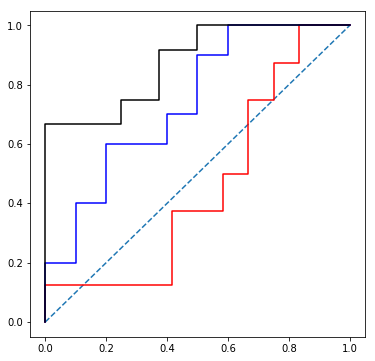

In [0]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])